In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import openpyxl

In [7]:
dataset= pd.read_excel("Superstore_USA.xlsx")

In [8]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [9]:
dataset.shape

(9426, 24)

In [10]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [11]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [12]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Order Priority

In [13]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [14]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [15]:
dataset['Order Priority']= dataset['Order Priority'].replace("Critical ","Critical")

In [16]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

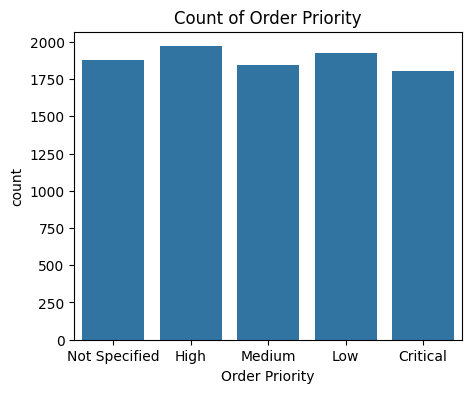

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x='Order Priority', data= dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

In [18]:
#The majority of orders fall under the 'Medium' priority category, followed by 'High' and 'Low':
#indicating a preference for medium priority orders.

# Ship Mode

In [19]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [20]:
x= dataset['Ship Mode'].value_counts().index
y= dataset['Ship Mode'].value_counts().values

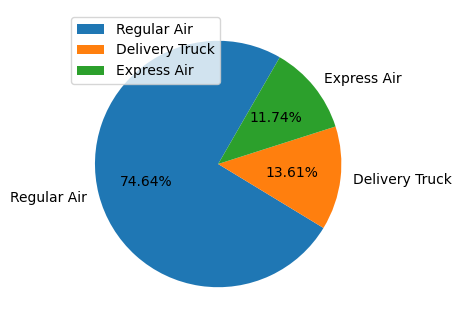

In [21]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x, startangle=60 ,autopct="%0.2f%%")
plt.legend(loc= 2)
plt.show()

In [22]:
#The pie chart likely shows that 'Regular Air' priority orders constitute the largest portion of sales, 
#reflecting the distribution seen in the count plot.

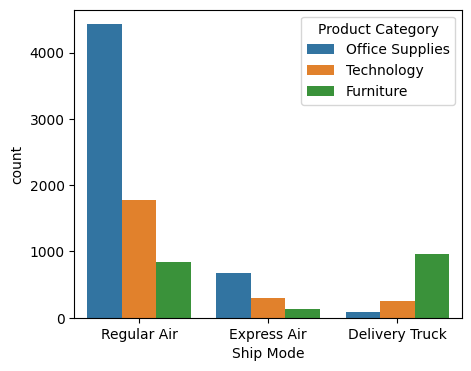

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(data= dataset,x ='Ship Mode', hue= 'Product Category')
plt.show()

In [24]:
# Most orders are shipped using the 'Regular Air' mode across all product categories, with 
#'Express Air Ship Mode' and 'Delivery Truck' being less common.

# Customer Segment
 

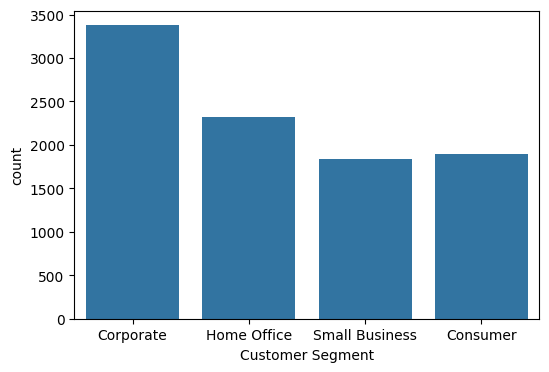

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data= dataset,x ='Customer Segment')
plt.show()

In [26]:
# Above data, we analysed that the 'Corporate' segment places the most orders, followed by 'Home Office' and 'Comsumer'

# Product Category

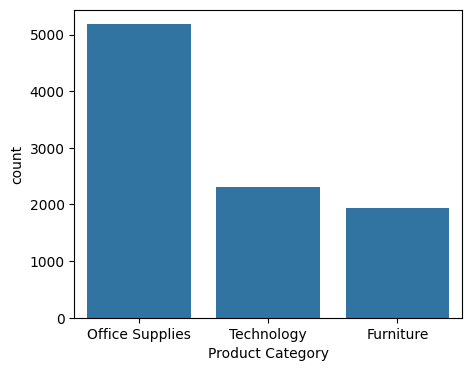

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(data= dataset,x ='Product Category')
plt.show()

In [28]:
# 'Office Supplies' is the most frequently ordered product category, suggesting high demand for office-related items.

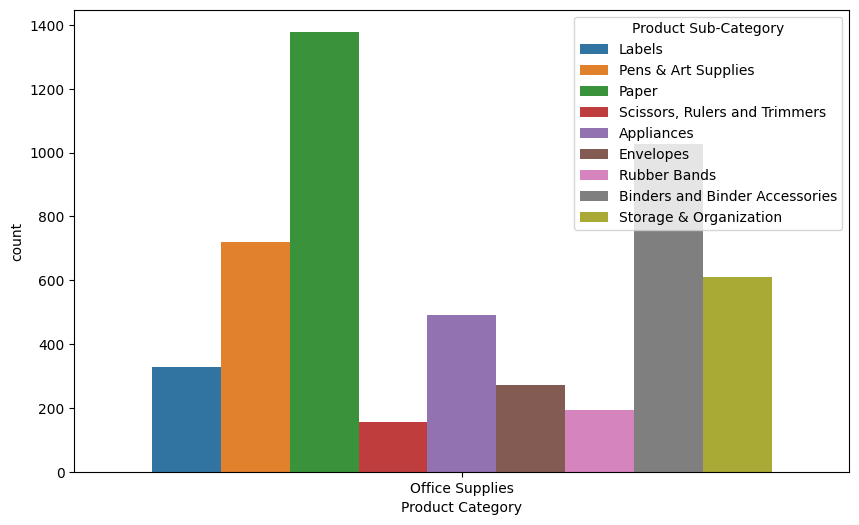

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x ='Product Category', data= dataset[dataset['Product Category']== 'Office Supplies'], hue='Product Sub-Category')
plt.show()

In [30]:
# Within office supplies, 'Binders' and 'Paper' are the most common sub-categories, reflecting essential office needs.


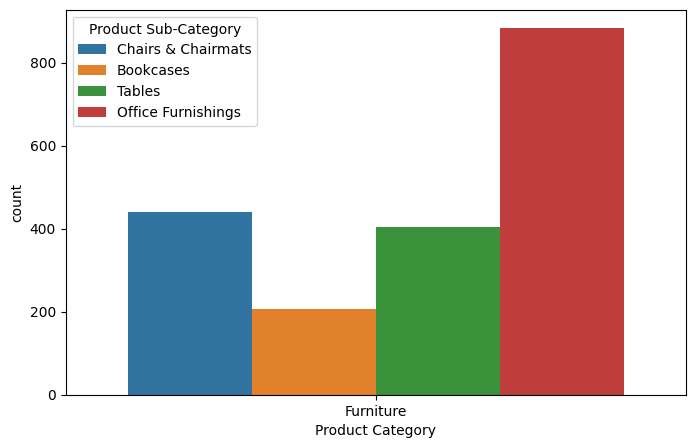

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Product Category', data= dataset[dataset['Product Category']== 'Furniture'], hue='Product Sub-Category')
plt.show()

In [32]:
# In the furniture category, 'Chairs' and 'Tables' are the dominant sub-categories, indicating higher demand for these items.

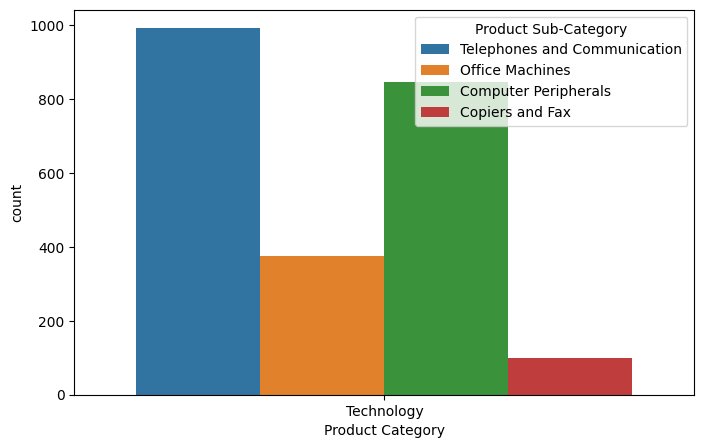

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x ='Product Category', data= dataset[dataset['Product Category']== 'Technology'], hue='Product Sub-Category')
plt.show()

In [34]:
# 'Phones' and 'Accessories' lead in the technology category, suggesting a focus on communication devices and their accessories.

# Order Year

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [36]:
dataset['Order year']=dataset['Order Date'].dt.year

In [37]:
dataset['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

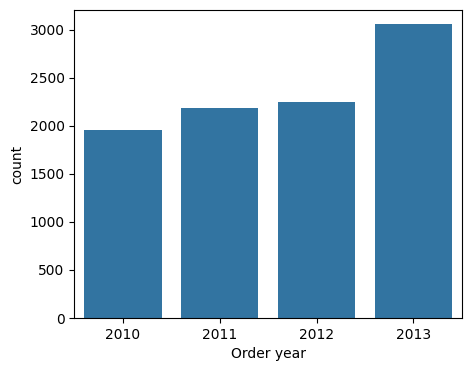

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(data= dataset,x ='Order year')
plt.show()

In [39]:
# The number of orders has generally increased over the years, showing a positive trend in sales growth.

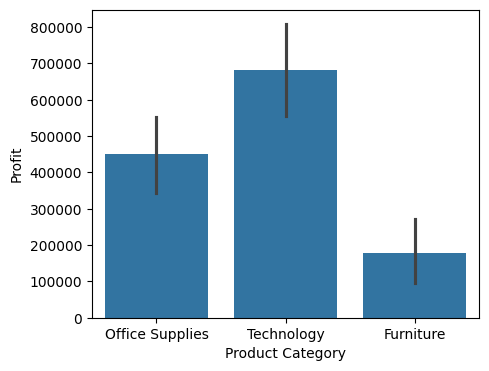

In [40]:
plt.figure(figsize=(5,4))
sns.barplot(x= "Product Category",y= "Profit", data= dataset,estimator="sum" )
plt.show()

In [41]:
# The technology category generates the highest profit, followed by furniture and office supplies, highlighting 
#technology as the most lucrative category.



# Top 5 State Sales

In [42]:
dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Product Base Margin

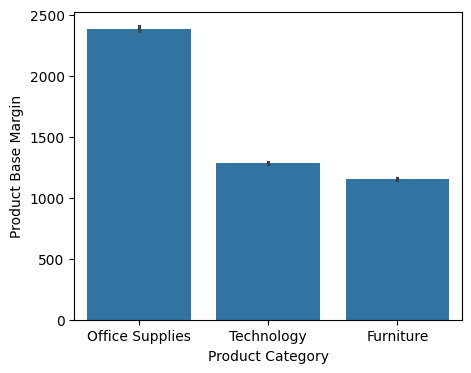

In [43]:
plt.figure(figsize=(5,4))
sns.barplot(x= "Product Category",y= "Product Base Margin", data= dataset,estimator="sum" )
plt.show()

In [44]:
# The base margin is highest for the technology category, followed by office supplies and furniture,
# indicating better profitability in technology.